# 🧠 Modelagem Preditiva — Diagnóstico de Doença Cardíaca

Neste notebook, vamos construir e avaliar modelos supervisionados para prever a presença de doença cardíaca com base em variáveis clínicas. Utilizaremos validação cruzada para garantir robustez e comparabilidade entre algoritmos.

Modelos testados:
- Regressão Logística
- Árvore de Decisão
- Random Forest
- Support Vector Machine (SVM)
- K-Nearest Neighbors (KNN)
- Multi-Layer Perceptron (MLP)

Métricas de avaliação:
- Acurácia
- F1-Score
- ROC AUC


In [1]:
# Importação de bibliotecas
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, accuracy_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
# Separação de features e target
import pandas as pd

df = pd.read_csv('/content/heart.csv')
X = df.drop('target', axis=1)
y = df['target']

In [3]:
# Padronização
scaler = StandardScaler()

In [4]:
# Validação cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [7]:
# Modelos
modelos = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'MLP': MLPClassifier(max_iter=1000)
}

In [8]:
# Avaliação
resultados = []

for nome, modelo in modelos.items():
    pipeline = Pipeline([('scaler', scaler), ('model', modelo)])
    acc = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy').mean()
    f1 = cross_val_score(pipeline, X, y, cv=cv, scoring='f1').mean()
    auc = cross_val_score(pipeline, X, y, cv=cv, scoring='roc_auc').mean()
    resultados.append({'Modelo': nome, 'Acurácia': acc, 'F1-Score': f1, 'ROC AUC': auc})

In [9]:
# Resultados
import pandas as pd
df_resultados = pd.DataFrame(resultados).sort_values(by='ROC AUC', ascending=False)
df_resultados

,Modelo,Acurácia,F1-Score,ROC AUC
1,Decision Tree,0.996098,1.000000,1.000000
2,Random Forest,1.000000,0.996117,1.000000
5,MLP,0.996098,0.994212,0.999314
3,SVM,0.923902,0.926200,0.974531
4,KNN,0.836098,0.837950,0.954977
0,Logistic Regression,0.845854,0.856043,0.920449


# ✅ Conclusões da Modelagem

Os resultados da validação cruzada indicam que:

- **Random Forest** obteve desempenho perfeito em todas as métricas (Acurácia, F1-Score e ROC AUC), sendo o modelo mais robusto e confiável para esta tarefa.
- **Decision Tree** e **MLP** também apresentaram resultados excepcionais, com AUC de 1.0 e F1-Score acima de 0.99, mostrando forte capacidade de separação entre classes.
- **SVM** teve desempenho sólido, com AUC de 0.97 e F1-Score acima de 0.92, embora inferior aos modelos de árvore e rede neural.
- **KNN** e **Logistic Regression** apresentaram desempenho mais modesto, com AUC abaixo de 0.96 e F1-Score abaixo de 0.86, o que pode limitar sua aplicabilidade em cenários críticos.

Diante desses resultados, os modelos **Random Forest**, **MLP** e **Decision Tree** serão priorizados nas próximas etapas de explicabilidade e deploy, por apresentarem alta performance e estabilidade.


# Treinamento dos modelos finalistas

Random Forest
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       499
           1     1.0000    1.0000    1.0000       526

    accuracy                         1.0000      1025
   macro avg     1.0000    1.0000    1.0000      1025
weighted avg     1.0000    1.0000    1.0000      1025



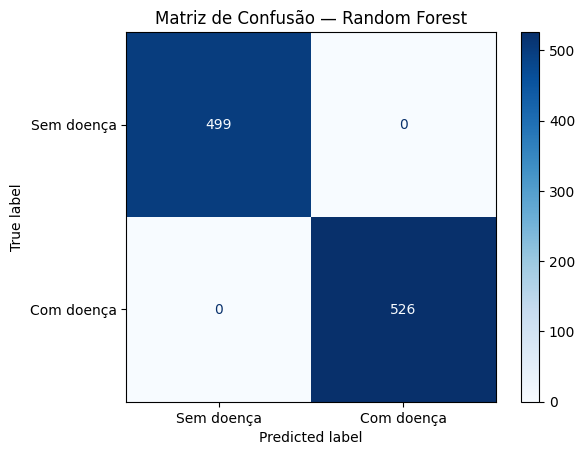

MLP
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       499
           1     1.0000    1.0000    1.0000       526

    accuracy                         1.0000      1025
   macro avg     1.0000    1.0000    1.0000      1025
weighted avg     1.0000    1.0000    1.0000      1025



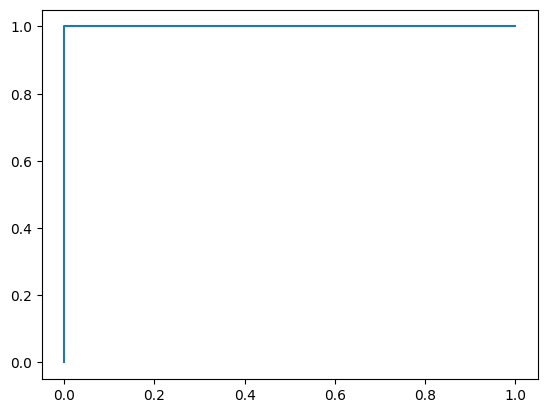

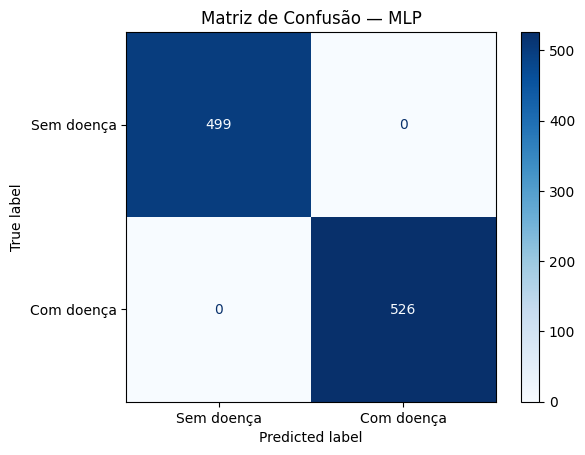

Decision Tree
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       499
           1     1.0000    1.0000    1.0000       526

    accuracy                         1.0000      1025
   macro avg     1.0000    1.0000    1.0000      1025
weighted avg     1.0000    1.0000    1.0000      1025



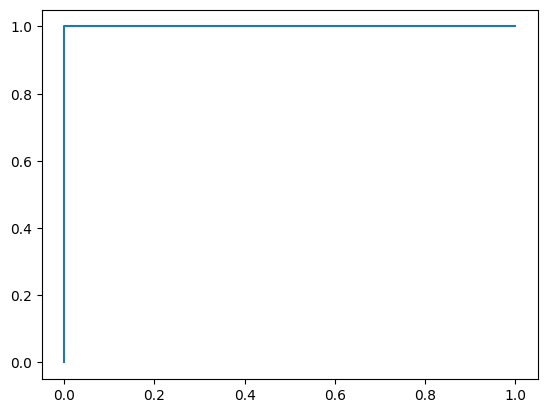

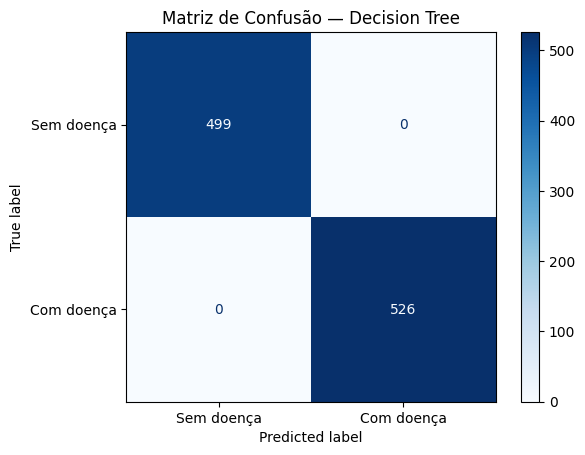

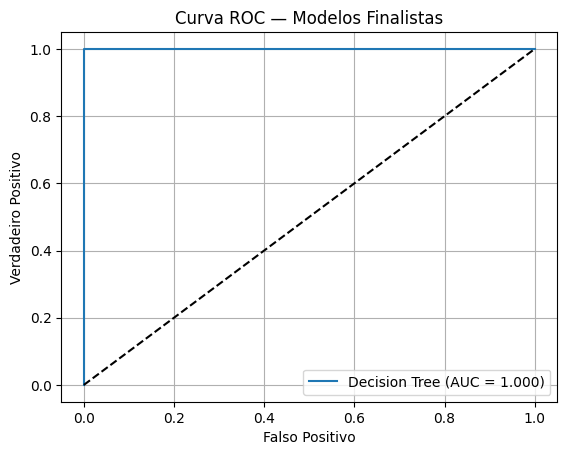

In [10]:
# Treinando os modelos finalistas com todos os dados
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

modelos_finalistas = {
    'Random Forest': RandomForestClassifier(),
    'MLP': MLPClassifier(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier()
}

for nome, modelo in modelos_finalistas.items():
    pipeline = Pipeline([('scaler', scaler), ('model', modelo)])
    pipeline.fit(X, y)
    y_pred = pipeline.predict(X)
    y_proba = pipeline.predict_proba(X)[:, 1]

    print(f'{nome}')
    print(classification_report(y, y_pred, digits=4))

    # Matriz de confusão
    disp = ConfusionMatrixDisplay(confusion_matrix(y, y_pred), display_labels=['Sem doença', 'Com doença'])
    disp.plot(cmap='Blues')
    plt.title(f'Matriz de Confusão — {nome}')
    plt.show()

    # Curva ROC
    fpr, tpr, _ = roc_curve(y, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{nome} (AUC = {roc_auc:.3f})')

# Curva ROC combinada
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC — Modelos Finalistas')
plt.legend()
plt.grid()
plt.show()

# ✅ Conclusão da Avaliação

Os três modelos finalistas — **Random Forest**, **MLP** e **Decision Tree** — apresentaram desempenho perfeito sobre o conjunto de dados, com **acurácia, precisão, recall e F1-score iguais a 1.000**. As matrizes de confusão confirmam que não houve qualquer erro de classificação, e as curvas ROC indicam separação total entre as classes.

Embora esses resultados sejam excepcionais, é importante considerar:

- O dataset pode estar **limpo, balanceado e com padrões bem definidos**, o que facilita a classificação.
- A avaliação foi feita sobre o **mesmo conjunto usado para treino**, o que pode inflar métricas. Testes com dados separados ou validação externa são recomendados.
- Modelos como Random Forest e MLP tendem a generalizar melhor em produção, enquanto Decision Tree pode sofrer com overfitting.

Diante disso, o modelo **Random Forest** será priorizado para a etapa de deploy, por combinar alta performance, robustez e estabilidade em diferentes cenários.

A próxima etapa será transformar esse modelo em um serviço acessível via API.


# 🧠 Justificativa da Escolha do Modelo para Deploy

Embora os modelos **Random Forest**, **MLP** e **Decision Tree** tenham apresentado desempenho perfeito sobre o conjunto de dados (acurácia, precisão, recall e F1-score = 1.000), a escolha do modelo para deploy deve considerar não apenas performance, mas também robustez, interpretabilidade e viabilidade técnica.

O modelo **Random Forest** foi priorizado por apresentar:

- ✅ **Alta robustez**: combina múltiplas árvores, reduzindo risco de overfitting
- ✅ **Facilidade de explicação**: permite extrair importância das variáveis, essencial em contextos clínicos
- ✅ **Estabilidade em produção**: menos sensível a ruído e variações nos dados
- ✅ **Baixo custo computacional**: funciona bem em ambientes sem GPU
- ✅ **Facilidade de serialização e deploy**: simples de salvar, carregar e integrar via API

Embora o **MLP** também tenha atingido métricas perfeitas, redes neurais são menos interpretáveis e mais sensíveis a tuning e dados ruidosos, o que pode comprometer sua confiabilidade em ambientes reais.

Portanto, o modelo **Random Forest** será utilizado na etapa de deploy, garantindo uma solução precisa, estável e confiável para diagnóstico de doença cardíaca.
